# **IMPORTING LIBRARIES AND FETCHING DATA SET**

In [71]:
import numpy as IMORTED____lib___numpy
import matplotlib.pyplot as IMORTED____lib___plot
import random
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

train = open("hd.txt","r")
X = IMORTED____lib___numpy.ndarray(shape=(303, 2), dtype=float)
Y = IMORTED____lib___numpy.ndarray(shape=(303, ), dtype=float)
i = 0
for line in train:
    col = line.split(',')
    X[i][0] = col[0]        
    X[i][1] = col[3]
    Y[i] = col[13].split('\n')[0]
    if(Y[i] == 0):
        Y[i] = -1
    else:
        Y[i] = 1
    i += 1
print(X)
print(Y)

[[ 63. 145.]
 [ 67. 160.]
 [ 67. 120.]
 [ 37. 130.]
 [ 41. 130.]
 [ 56. 120.]
 [ 62. 140.]
 [ 57. 120.]
 [ 63. 130.]
 [ 53. 140.]
 [ 57. 140.]
 [ 56. 140.]
 [ 56. 130.]
 [ 44. 120.]
 [ 52. 172.]
 [ 57. 150.]
 [ 48. 110.]
 [ 54. 140.]
 [ 48. 130.]
 [ 49. 130.]
 [ 64. 110.]
 [ 58. 150.]
 [ 58. 120.]
 [ 58. 132.]
 [ 60. 130.]
 [ 50. 120.]
 [ 58. 120.]
 [ 66. 150.]
 [ 43. 150.]
 [ 40. 110.]
 [ 69. 140.]
 [ 60. 117.]
 [ 64. 140.]
 [ 59. 135.]
 [ 44. 130.]
 [ 42. 140.]
 [ 43. 120.]
 [ 57. 150.]
 [ 55. 132.]
 [ 61. 150.]
 [ 65. 150.]
 [ 40. 140.]
 [ 71. 160.]
 [ 59. 150.]
 [ 61. 130.]
 [ 58. 112.]
 [ 51. 110.]
 [ 50. 150.]
 [ 65. 140.]
 [ 53. 130.]
 [ 41. 105.]
 [ 65. 120.]
 [ 44. 112.]
 [ 44. 130.]
 [ 60. 130.]
 [ 54. 124.]
 [ 50. 140.]
 [ 41. 110.]
 [ 54. 125.]
 [ 51. 125.]
 [ 51. 130.]
 [ 46. 142.]
 [ 58. 128.]
 [ 54. 135.]
 [ 54. 120.]
 [ 60. 145.]
 [ 60. 140.]
 [ 54. 150.]
 [ 59. 170.]
 [ 46. 150.]
 [ 65. 155.]
 [ 67. 125.]
 [ 62. 120.]
 [ 65. 110.]
 [ 44. 110.]
 [ 65. 160.]
 [ 60. 125.]

# **NORMALIZATION AND DATA SET SPLITTING**

In [72]:

X = preprocessing.MinMaxScaler().fit_transform(X)
print(X)





X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.70, random_state=42)
print(X_train.shape)
print(X_test.shape)


[[0.70833333 0.48113208]
 [0.79166667 0.62264151]
 [0.79166667 0.24528302]
 [0.16666667 0.33962264]
 [0.25       0.33962264]
 [0.5625     0.24528302]
 [0.6875     0.43396226]
 [0.58333333 0.24528302]
 [0.70833333 0.33962264]
 [0.5        0.43396226]
 [0.58333333 0.43396226]
 [0.5625     0.43396226]
 [0.5625     0.33962264]
 [0.3125     0.24528302]
 [0.47916667 0.73584906]
 [0.58333333 0.52830189]
 [0.39583333 0.1509434 ]
 [0.52083333 0.43396226]
 [0.39583333 0.33962264]
 [0.41666667 0.33962264]
 [0.72916667 0.1509434 ]
 [0.60416667 0.52830189]
 [0.60416667 0.24528302]
 [0.60416667 0.35849057]
 [0.64583333 0.33962264]
 [0.4375     0.24528302]
 [0.60416667 0.24528302]
 [0.77083333 0.52830189]
 [0.29166667 0.52830189]
 [0.22916667 0.1509434 ]
 [0.83333333 0.43396226]
 [0.64583333 0.21698113]
 [0.72916667 0.43396226]
 [0.625      0.38679245]
 [0.3125     0.33962264]
 [0.27083333 0.43396226]
 [0.29166667 0.24528302]
 [0.58333333 0.52830189]
 [0.54166667 0.35849057]
 [0.66666667 0.52830189]


# **Defining SMO Fuctions**

In [73]:
def Sequential____Minimal____Optimization(data, label, C = 1.0, kernel_type = 'linear'):
    Sequential____Minimal____Optimization_______diff = IMORTED____lib___numpy.inf
    epsilon = 0.001
    samples, features = data.shape
    Sequential____Minimal____Optimi_____alpha = IMORTED____lib___numpy.zeros(samples)
    if kernel_type == 'linear':
        kernel = Sequential____Minimal____Optimization____linear_kernel
    if kernel_type == 'polynomial':
        kernel = Sequential____Minimal____Optimization____polynomial_kernel
    if kernel_type == 'rbf':
        kernel = Sequential____Minimal____Optimization____rbf_kernel
    
    
    
    current_iteration = 0
    W = 0
    B = 0
    TOTAL________NUM______passes = 0
    max_passes = 100
    tol = 0.0001
    
    
    
    
    while TOTAL________NUM______passes < max_passes:
        current_iteration += 1
        alpha_old = IMORTED____lib___numpy.copy(Sequential____Minimal____Optimi_____alpha)
        changes = 0
        for i in range(samples):
            W = data.T@(alpha_old*label)
            Error_i = IMORTED____lib___numpy.sign(W.T@data[i] + B) - label[i]
            if not (((label[i]*Error_i < -tol) and (Sequential____Minimal____Optimi_____alpha[i] < C)) or ((label[i]*Error_i > tol))):
                continue
            j = i
            while j == i:
                j = random.randint(0, samples-1)
            eta = 2 * kernel(data[i], data[j]) - kernel(data[i], data[i]) - kernel(data[j], data[j])
            if eta == 0:
                continue
            if(label[i] != label[j]):
                L = max(0, Sequential____Minimal____Optimi_____alpha[j] - Sequential____Minimal____Optimi_____alpha[i])
                H = min(C, C - Sequential____Minimal____Optimi_____alpha[i] + Sequential____Minimal____Optimi_____alpha[j])
            else:
                L = max(0, Sequential____Minimal____Optimi_____alpha[i] + Sequential____Minimal____Optimi_____alpha[j] - C)
                H = min(C, Sequential____Minimal____Optimi_____alpha[i] + Sequential____Minimal____Optimi_____alpha[j])
            if L == H:
                continue
            
            
            
            Sequential____Minimal____Optimization__Error_j = IMORTED____lib___numpy.sign(W.T@data[j] + B) - label[j]
            Sequential____Minimal____Optimi_____alpha[j] = alpha_old[j] - label[j] * (Error_i - Sequential____Minimal____Optimization__Error_j)/ eta
            
            
            
            
            if Sequential____Minimal____Optimi_____alpha[j] > H:
                Sequential____Minimal____Optimi_____alpha[j] = H
            if Sequential____Minimal____Optimi_____alpha[j] < L:
                Sequential____Minimal____Optimi_____alpha[j] = L
            if abs(Sequential____Minimal____Optimi_____alpha[j] - alpha_old[j]) < 0.00001:
                Sequential____Minimal____Optimi_____alpha[j] = alpha_old[j]
                continue
            Sequential____Minimal____Optimi_____alpha[i] = alpha_old[i] + label[i]*label[j] * (alpha_old[j] - Sequential____Minimal____Optimi_____alpha[j])
            b1 = B - Error_i - label[i]*(Sequential____Minimal____Optimi_____alpha[i] - alpha_old[i]) * kernel(data[i], data[i]) - label[j]*(Sequential____Minimal____Optimi_____alpha[j] - alpha_old[j]) * kernel(data[i], data[j])
            b2 = B - Sequential____Minimal____Optimization__Error_j - label[i]*(Sequential____Minimal____Optimi_____alpha[i] - alpha_old[i]) * kernel(data[i], data[j]) - label[j]*(Sequential____Minimal____Optimi_____alpha[j] - alpha_old[j]) * kernel(data[j], data[j])
            if Sequential____Minimal____Optimi_____alpha[i] > 0 and Sequential____Minimal____Optimi_____alpha[i] < C:
                B = b1
            elif Sequential____Minimal____Optimi_____alpha[j] > 0 and Sequential____Minimal____Optimi_____alpha[j] < C:
                B = b2
            else:
                B = (b1 + b2) / 2
            changes += 1
        
        
        
        
        
        if changes == 0:
            TOTAL________NUM______passes += 1
        else:
            TOTAL________NUM______passes = 0

        
        
        Sequential____Minimal____Optimization_______diff = IMORTED____lib___numpy.linalg.norm(Sequential____Minimal____Optimi_____alpha - alpha_old)
        
        print('Iteration : ', current_iteration , ', Difference : ' , Sequential____Minimal____Optimization_______diff, ', Changes : ', changes)
    
    
    W = data.T@(Sequential____Minimal____Optimi_____alpha * label)
    B = IMORTED____lib___numpy.mean(label - W.T@data.T)
    return W, B

def Sequential____Minimal____Optimization____linear_kernel(x1, x2):
    return x1@x2.T





def Sequential____Minimal____Optimization____polynomial_kernel(x1, x2):
    return (x1@x2.T+1)**2






def Sequential____Minimal____Optimization____rbf_kernel(x1, x2, sigma = 1):
    return IMORTED____lib___numpy.exp(-IMORTED____lib___numpy.linalg.norm(x1 - x2) ** 2 / (2 * (sigma ** 2)))



#Defining Accuracy Functions and Predicting

In [76]:
def predict(data, W, B, total__________var__________threshhold = 0):
    if total__________var__________threshhold == 0:
        return IMORTED____lib___numpy.sign(W.T@data.T + B)
    final_________________result = W.T@data.T + B
    ret = []
    for THRESHOLD_________________val in final_________________result:
        if THRESHOLD_________________val >= total__________var__________threshhold:
            ret.append(1)
        else:
            ret.append(-1)
    return IMORTED____lib___numpy.array(ret)

W, B = Sequential____Minimal____Optimization(X_train, y_train, C = 1, kernel_type='polynomial')

def Sequential____Minimal____Optimization_____Accuracy(actual, predict):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predict[i]:
            correct += 1
    return correct / len(actual) * 100




Y_predict = predict(X_test, W, B)
print(Sequential____Minimal____Optimization_____Accuracy(y_test, Y_predict))




def Fetching____________TPRandFPR(predicted, actual):
    confusion_matrix = IMORTED____lib___numpy.zeros((2,2))
    for i in range(len(predicted)):
        if(actual[i] == -1):
            if predicted[i] == -1:
                confusion_matrix[0][0] += 1
            if predicted[i] == 1:
                confusion_matrix[0][1] += 1
        else:
            if predicted[i] == -1:
                confusion_matrix[1][0] += 1
            if predicted[i] == 1:
                confusion_matrix[1][1] += 1
    TOTAL____NUM____OF___TRUE___PR = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
    TOTAL____NUM____OF___FALSE___PR = confusion_matrix[0][1] / (confusion_matrix[0][1] + confusion_matrix[0][0])
    return TOTAL____NUM____OF___TRUE___PR, TOTAL____NUM____OF___FALSE___PR


Iteration :  1 , Difference :  8.18535277187245 , Changes :  40
Iteration :  2 , Difference :  5.914664213382954 , Changes :  21
Iteration :  3 , Difference :  5.868872228843154 , Changes :  19
Iteration :  4 , Difference :  4.714000083959629 , Changes :  12
Iteration :  5 , Difference :  3.1447957583317567 , Changes :  7
Iteration :  6 , Difference :  3.219974876653824 , Changes :  8
Iteration :  7 , Difference :  3.050879777562697 , Changes :  5
Iteration :  8 , Difference :  3.4641016151377544 , Changes :  6
Iteration :  9 , Difference :  1.4142135623730951 , Changes :  1
Iteration :  10 , Difference :  2.7046828255865756 , Changes :  5
Iteration :  11 , Difference :  2.054701144101347 , Changes :  3
Iteration :  12 , Difference :  2.0 , Changes :  2
Iteration :  13 , Difference :  0.5431551333887922 , Changes :  2
Iteration :  14 , Difference :  1.9440886613636785 , Changes :  3
Iteration :  15 , Difference :  0.0 , Changes :  0
Iteration :  16 , Difference :  0.0 , Changes :  0
It

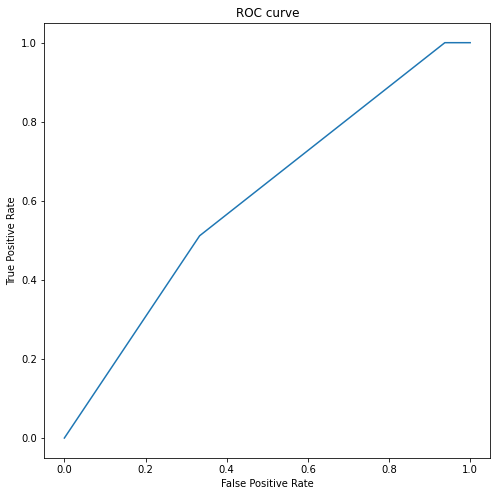

In [77]:
TOTAL___________threshholds = IMORTED____lib___numpy.arange(-500, 500, 2)
VAR_____________X______plot_____ = []
VAR_____________Y______plot = []
for THRESHOLD_________________val in TOTAL___________threshholds:
    TOTAL____NUM____OF___TRUE___PR, TOTAL____NUM____OF___FALSE___PR =Fetching____________TPRandFPR(predict(X_test, W, B, THRESHOLD_________________val),y_test)
    VAR_____________X______plot_____.append(TOTAL____NUM____OF___FALSE___PR)
    VAR_____________Y______plot.append(TOTAL____NUM____OF___TRUE___PR)

IMORTED____lib___plot.figure(figsize=(8,8))
IMORTED____lib___plot.title('ROC curve')
IMORTED____lib___plot.xlabel('False Positive Rate')
IMORTED____lib___plot.ylabel('True Positive Rate')
IMORTED____lib___plot.plot(VAR_____________X______plot_____,VAR_____________Y______plot)

